In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 15, n_output = 1

In [4]:
df = pd.read_excel("Data/US15I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Input 13,Input 14,Input 15,Output 01
DMU 0001,275.46,50.34,340.07,198.33,252.31,152.33,171.94,351.93,99.92,276.03,521.97,377.73,182.73,323.82,149.79,604.61
DMU 0002,215.47,60.38,340.06,310.86,293.92,194.99,213.47,449.00,236.11,219.68,448.57,389.20,136.40,381.47,155.19,549.84
DMU 0003,300.23,64.11,340.12,309.33,318.17,150.53,158.62,260.07,220.55,198.77,347.80,180.49,143.57,314.84,152.35,374.89
DMU 0004,318.80,70.69,340.03,308.70,284.31,177.03,184.56,248.79,196.65,194.76,308.82,370.43,154.72,236.00,150.82,308.83
DMU 0005,308.48,76.50,340.03,300.18,320.88,186.92,207.32,311.17,217.06,213.73,369.79,371.99,140.98,334.56,153.16,478.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,229.84,62.77,340.10,307.80,251.16,170.90,181.09,345.93,209.08,206.03,420.21,324.91,145.44,267.75,152.00,434.69
DMU 0997,277.75,63.85,340.07,297.61,292.52,163.04,211.13,295.84,217.56,231.60,454.72,233.57,140.77,400.10,155.33,528.69
DMU 0998,245.12,44.22,340.05,310.36,284.72,157.20,154.61,341.60,168.51,281.86,383.23,351.73,166.37,259.97,151.17,448.42
DMU 0999,229.51,72.14,340.09,313.09,277.03,161.84,177.60,347.74,232.43,226.38,397.84,333.21,132.83,351.30,154.23,483.78


In [5]:
df_sol = pd.read_excel("US15I1O_gradientboostingregressor_Solution.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.851845,0.000197,0.000197,0.000000,0.000197,0.000197,0.000000,0.000000,0.000197,0.000197,0.000197,0.000197,0.000815,0.000000,0.000815,0.000197,0.001409
DMU 0002,0.720842,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000215,0.000044,0.000215,0.000624,0.000624,0.000044,0.000624,0.000044,0.001311
DMU 0003,0.711611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000618,0.000000,0.000000,0.000618,0.001261,0.000000,0.001261,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000859,0.000859,0.000000,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.000000,0.000721,0.000721,0.000000,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.687572,0.000213,0.000213,0.000000,0.000000,0.000213,0.000000,0.000000,0.000213,0.000213,0.000213,0.000213,0.001066,0.000000,0.001066,0.000000,0.001582
DMU 0997,0.797473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000722,0.000000,0.000000,0.000722,0.000722,0.000000,0.000722,0.000000,0.001508
DMU 0998,0.707104,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000339,0.000050,0.000050,0.000772,0.000772,0.000050,0.000772,0.000050,0.001577
DMU 0999,0.712811,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000317,0.000047,0.000047,0.000721,0.000721,0.000047,0.000721,0.000047,0.001473


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-a53c0305-ab54-4848-bbdb-4cbf5de26136", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      507
Weight_Input 02      486
Weight_Input 03      782
Weight_Input 04      770
Weight_Input 05      492
Weight_Input 06      774
Weight_Input 07      780
Weight_Input 08       32
Weight_Input 09      481
Weight_Input 10      372
Weight_Input 11       26
Weight_Input 12        0
Weight_Input 13      771
Weight_Input 14        0
Weight_Input 15      770
Weight_Output 01       0
dtype: int64
Total :  7043


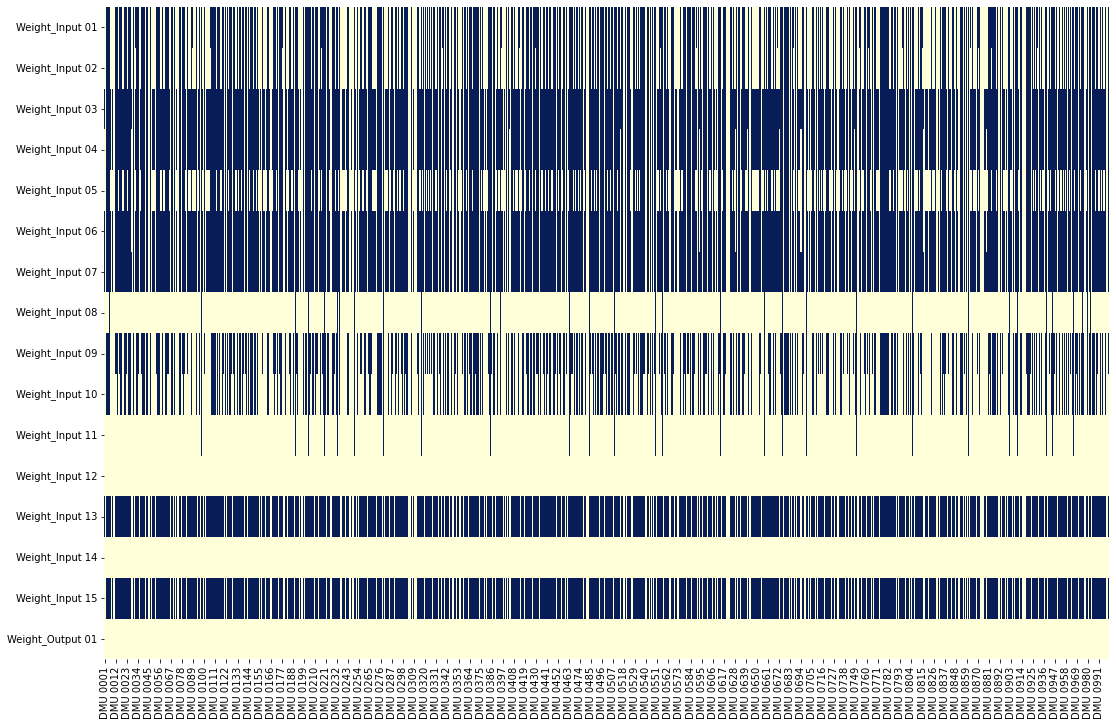

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

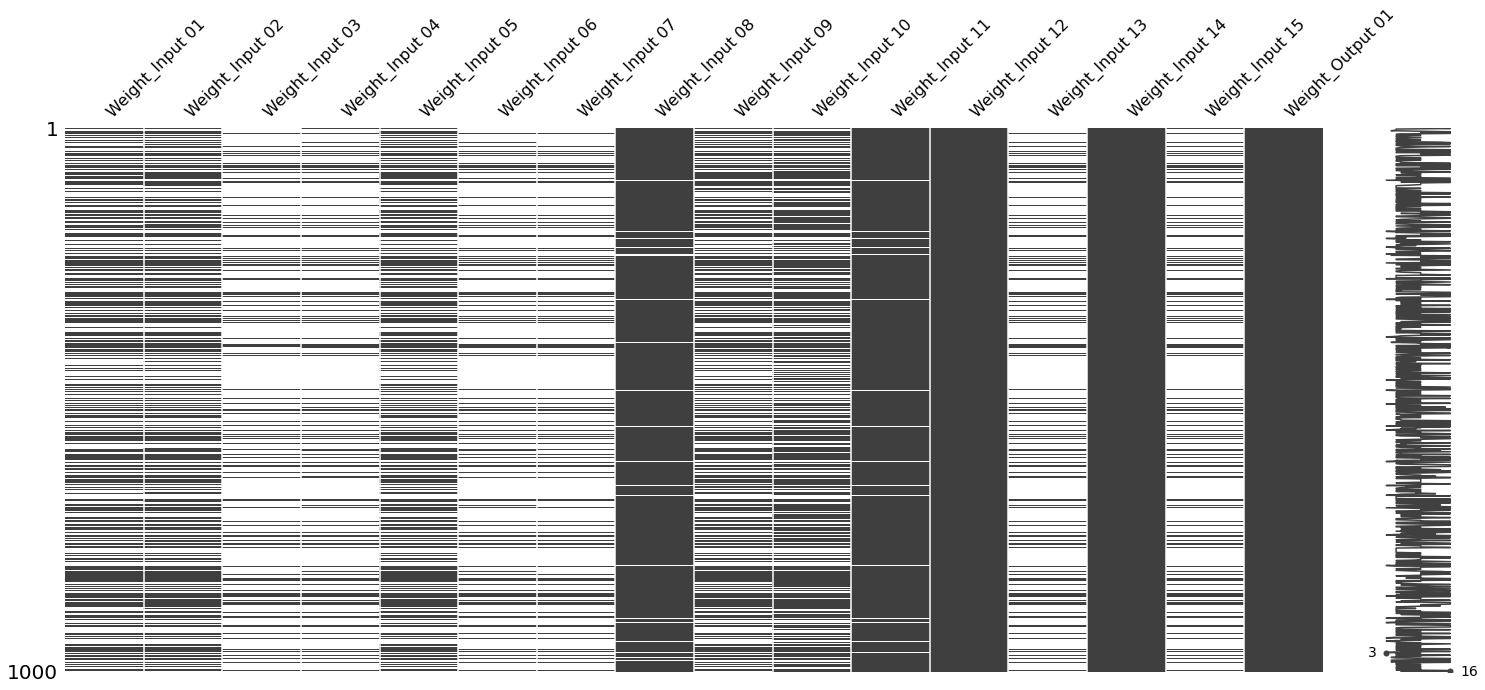

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [10]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        7.043000
std         4.332889
min         0.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        13.000000
dtype: float64

### DecisionTreeRegressor

In [11]:
df_dt = pd.read_excel("US15I1O_decisiontreeregressor_Solution_2.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.827280,0.000128,0.000128,0.0,0.000128,0.000128,0.0,0.0,0.000541,0.000128,0.000128,0.000541,0.000541,0.0,0.000541,0.0,0.001368
DMU 0002,0.729031,0.000297,0.000297,0.0,0.000000,0.000000,0.0,0.0,0.000297,0.000000,0.000297,0.000590,0.000590,0.0,0.000590,0.0,0.001326
DMU 0003,0.711432,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000686,0.000000,0.000000,0.000974,0.000974,0.0,0.000974,0.0,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000859,0.000000,0.000000,0.000859,0.000859,0.0,0.000859,0.0,0.001794
DMU 0005,0.721465,0.000254,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000664,0.000000,0.000000,0.000664,0.000664,0.0,0.000664,0.0,0.001507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.684394,0.000139,0.000139,0.0,0.000000,0.000139,0.0,0.0,0.000425,0.000000,0.000139,0.000740,0.000740,0.0,0.000740,0.0,0.001574
DMU 0997,0.804563,0.000257,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000671,0.000000,0.000000,0.000671,0.000671,0.0,0.000671,0.0,0.001522
DMU 0998,0.712726,0.000246,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000634,0.000000,0.000000,0.000727,0.000727,0.0,0.000727,0.0,0.001589
DMU 0999,0.722939,0.000231,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000596,0.000000,0.000000,0.000684,0.000684,0.0,0.000684,0.0,0.001494


In [12]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      236
Weight_Input 02      710
Weight_Input 03      897
Weight_Input 04      860
Weight_Input 05      765
Weight_Input 06      904
Weight_Input 07      889
Weight_Input 08       11
Weight_Input 09      881
Weight_Input 10      576
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      956
Weight_Input 14        0
Weight_Input 15      894
Weight_Output 01       0
dtype: int64
Total :  8582


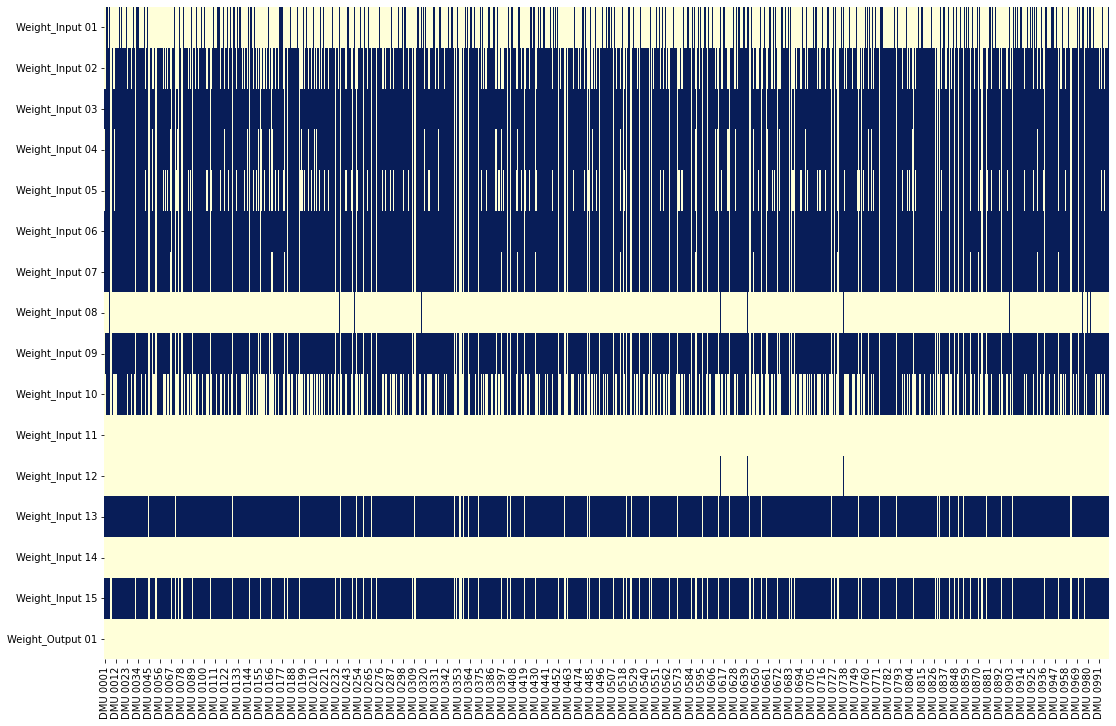

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [14]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8518,0.8273,0.0246,2.8837,True
DMU 0002,0.7208,0.7290,-0.0082,-1.1361,True
DMU 0003,0.7116,0.7114,0.0002,0.0252,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7215,-0.0008,-0.1176,True
...,...,...,...,...,...
DMU 0996,0.6876,0.6844,0.0032,0.4623,True
DMU 0997,0.7975,0.8046,-0.0071,-0.8890,True
DMU 0998,0.7071,0.7127,-0.0056,-0.7951,True
DMU 0999,0.7128,0.7229,-0.0101,-1.4209,True


In [15]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-33418898-4ad0-4b46-ac48-7de3d88ab919", "code": {"imports…

In [16]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  994
red :  6


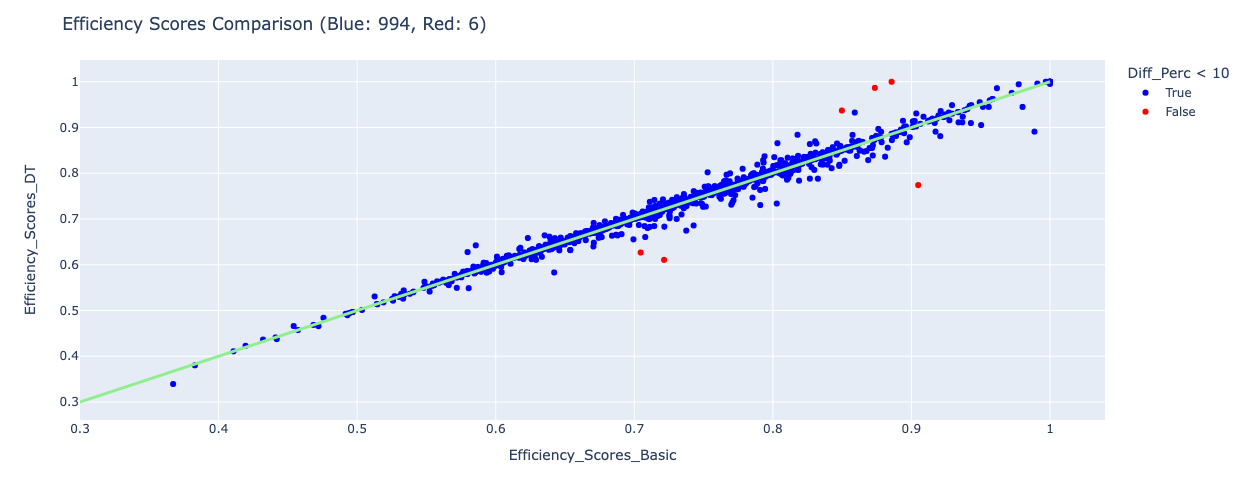

In [17]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [18]:
df_rf = pd.read_excel("US15I1O_randomforestregressor_Solution_2.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.829580,0.000000,0.000000,0.0,0.0,0.000532,0.0,0.0,0.000550,0.0,0.000000,0.000550,0.000550,0.0,0.000550,0.0,0.001372
DMU 0002,0.725239,0.000167,0.000167,0.0,0.0,0.000167,0.0,0.0,0.000167,0.0,0.000167,0.000651,0.000651,0.0,0.000651,0.0,0.001319
DMU 0003,0.711432,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000686,0.0,0.000000,0.000974,0.000974,0.0,0.000974,0.0,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000859,0.0,0.000000,0.000859,0.000859,0.0,0.000859,0.0,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000721,0.0,0.000000,0.000721,0.000721,0.0,0.000721,0.0,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.684651,0.000121,0.000121,0.0,0.0,0.000160,0.0,0.0,0.000405,0.0,0.000121,0.000750,0.000750,0.0,0.000750,0.0,0.001575
DMU 0997,0.800611,0.000178,0.000000,0.0,0.0,0.000178,0.0,0.0,0.000649,0.0,0.000000,0.000649,0.000649,0.0,0.000649,0.0,0.001514
DMU 0998,0.713986,0.000132,0.000132,0.0,0.0,0.000132,0.0,0.0,0.000464,0.0,0.000000,0.000770,0.000770,0.0,0.000770,0.0,0.001592
DMU 0999,0.720326,0.000128,0.000000,0.0,0.0,0.000128,0.0,0.0,0.000444,0.0,0.000000,0.000721,0.000721,0.0,0.000721,0.0,0.001489


In [19]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      341
Weight_Input 02      464
Weight_Input 03      919
Weight_Input 04      905
Weight_Input 05      293
Weight_Input 06      909
Weight_Input 07      913
Weight_Input 08       10
Weight_Input 09      876
Weight_Input 10      713
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      933
Weight_Input 14        0
Weight_Input 15      937
Weight_Output 01       0
dtype: int64
Total :  8216


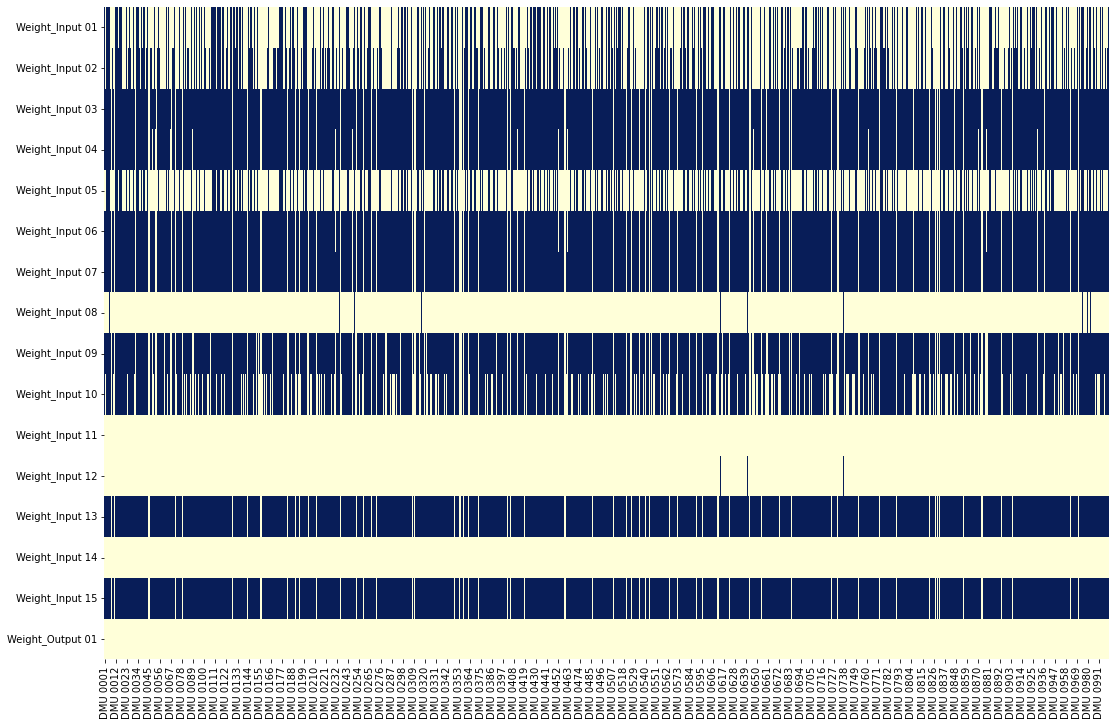

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [21]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8518,0.8296,0.0223,2.6137,True
DMU 0002,0.7208,0.7252,-0.0044,-0.6100,True
DMU 0003,0.7116,0.7114,0.0002,0.0252,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7206,0.0000,0.0000,True
...,...,...,...,...,...
DMU 0996,0.6876,0.6847,0.0029,0.4248,True
DMU 0997,0.7975,0.8006,-0.0031,-0.3935,True
DMU 0998,0.7071,0.7140,-0.0069,-0.9732,True
DMU 0999,0.7128,0.7203,-0.0075,-1.0543,True


In [22]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-bc2b2afc-2cd5-4efe-a4d8-a3736b00cc5c", "code": {"imports…

In [23]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  993
red :  7


In [24]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [25]:
df_gb = pd.read_excel("US15I1O_gradientboostingregressor_Solution_2.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.827280,0.000128,0.000128,0.0,0.000128,0.000128,0.0,0.0,0.000541,0.000128,0.000128,0.000541,0.000541,0.0,0.000541,0.0,0.001368
DMU 0002,0.720755,0.000291,0.000291,0.0,0.000000,0.000000,0.0,0.0,0.000291,0.000000,0.000000,0.000647,0.000647,0.0,0.000647,0.0,0.001311
DMU 0003,0.711432,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000686,0.000000,0.000000,0.000974,0.000974,0.0,0.000974,0.0,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000859,0.000000,0.000000,0.000859,0.000859,0.0,0.000859,0.0,0.001794
DMU 0005,0.721465,0.000254,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000664,0.000000,0.000000,0.000664,0.000664,0.0,0.000664,0.0,0.001507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.682688,0.000243,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000626,0.000000,0.000000,0.000718,0.000718,0.0,0.000718,0.0,0.001571
DMU 0997,0.804563,0.000257,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000671,0.000000,0.000000,0.000671,0.000671,0.0,0.000671,0.0,0.001522
DMU 0998,0.715431,0.000230,0.000230,0.0,0.000000,0.000000,0.0,0.0,0.000608,0.000000,0.000000,0.000729,0.000729,0.0,0.000729,0.0,0.001595
DMU 0999,0.722939,0.000231,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000596,0.000000,0.000000,0.000684,0.000684,0.0,0.000684,0.0,0.001494


In [26]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      233
Weight_Input 02      481
Weight_Input 03      875
Weight_Input 04      870
Weight_Input 05      830
Weight_Input 06      908
Weight_Input 07      891
Weight_Input 08       12
Weight_Input 09      745
Weight_Input 10      805
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      901
Weight_Input 14        0
Weight_Input 15      873
Weight_Output 01       0
dtype: int64
Total :  8427


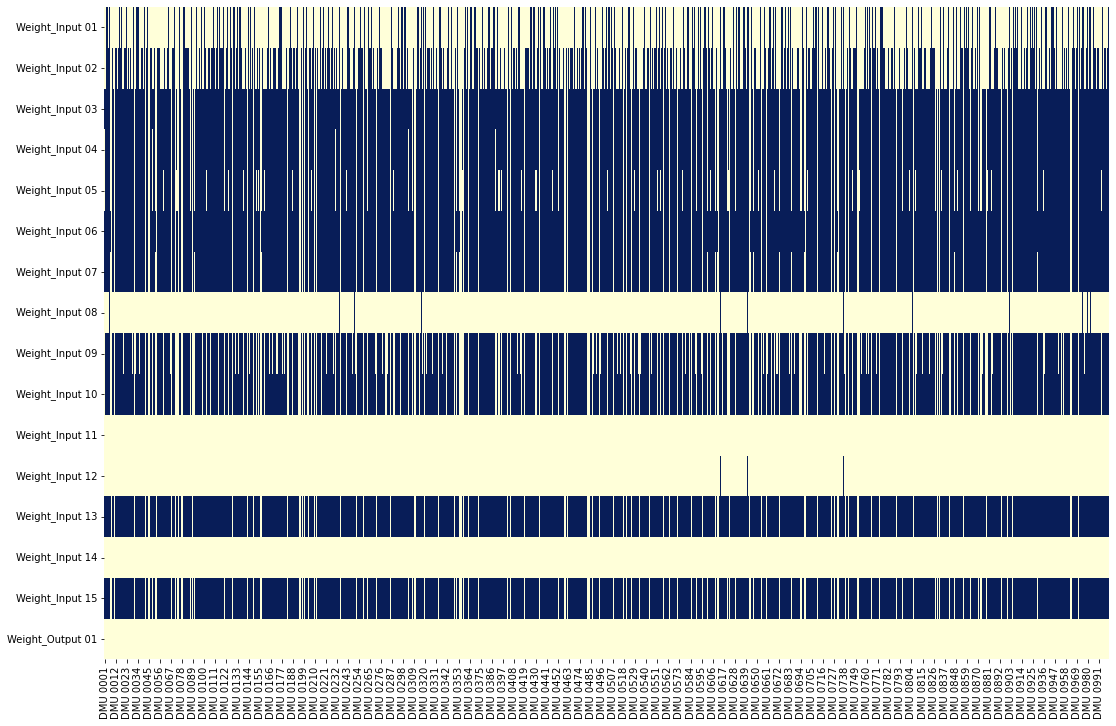

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [28]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8518,0.8273,0.0246,2.8837,True
DMU 0002,0.7208,0.7208,0.0001,0.0120,True
DMU 0003,0.7116,0.7114,0.0002,0.0252,True
DMU 0004,0.5540,0.5540,0.0000,0.0000,True
DMU 0005,0.7206,0.7215,-0.0008,-0.1176,True
...,...,...,...,...,...
DMU 0996,0.6876,0.6827,0.0049,0.7104,True
DMU 0997,0.7975,0.8046,-0.0071,-0.8890,True
DMU 0998,0.7071,0.7154,-0.0083,-1.1776,True
DMU 0999,0.7128,0.7229,-0.0101,-1.4209,True


In [29]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-14e49fb0-94e9-485a-9068-28502c5a461f", "code": {"imports…

In [30]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  993
red :  7


In [31]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [32]:
df_xgb = pd.read_excel("US15I1O_xgbregressor_Solution_2.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.857996,0.000000,0.000261,0.000000,0.000261,0.000261,0.000261,0.000000,0.000261,0.000261,0.000261,0.000261,0.000661,0.000000,0.000661,0.000261,0.001419
DMU 0002,0.733861,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000596,0.000596,0.000596,0.000054,0.000596,0.000054,0.001335
DMU 0003,0.679260,0.000000,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.001508,0.000095,0.001508,0.000095,0.001812
DMU 0004,0.530710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000452,0.000452,0.000452,0.000777,0.000777,0.000000,0.000777,0.000000,0.001718
DMU 0005,0.705559,0.000040,0.000111,0.000040,0.000040,0.000040,0.000040,0.000040,0.000111,0.000111,0.000654,0.000654,0.000654,0.000040,0.000654,0.000111,0.001473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.683673,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.001285,0.000079,0.001285,0.000079,0.001573
DMU 0997,0.782876,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.001210,0.000074,0.001210,0.000074,0.001481
DMU 0998,0.699689,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000473,0.000940,0.000092,0.000940,0.000092,0.001560
DMU 0999,0.707141,0.000029,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000652,0.000652,0.000652,0.000063,0.000652,0.000063,0.001462


In [33]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      526
Weight_Input 02      137
Weight_Input 03      407
Weight_Input 04      383
Weight_Input 05      229
Weight_Input 06      386
Weight_Input 07      405
Weight_Input 08       70
Weight_Input 09       70
Weight_Input 10       57
Weight_Input 11       34
Weight_Input 12        0
Weight_Input 13      399
Weight_Input 14        0
Weight_Input 15      162
Weight_Output 01       0
dtype: int64
Total :  3265


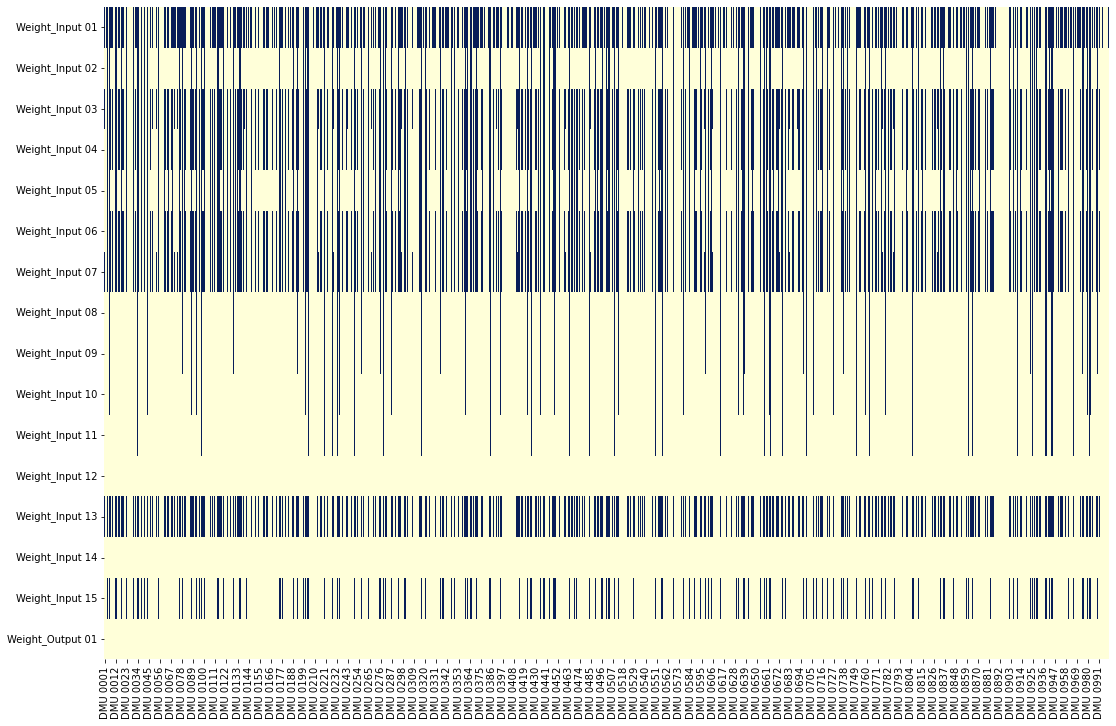

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [35]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.8518,0.8580,-0.0062,-0.7221,True
DMU 0002,0.7208,0.7339,-0.0130,-1.8061,True
DMU 0003,0.7116,0.6793,0.0324,4.5461,True
DMU 0004,0.5540,0.5307,0.0232,4.1964,True
DMU 0005,0.7206,0.7056,0.0151,2.0896,True
...,...,...,...,...,...
DMU 0996,0.6876,0.6837,0.0039,0.5671,True
DMU 0997,0.7975,0.7829,0.0146,1.8304,True
DMU 0998,0.7071,0.6997,0.0074,1.0487,True
DMU 0999,0.7128,0.7071,0.0057,0.7953,True


In [36]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-086eaaa1-6149-41c7-a8ab-2a548463b20e", "code": {"imports…

In [37]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


In [38]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()